In [14]:
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.cross_validation import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
import seaborn as sns

df = pd.read_csv('Final Data');
#df.describe()

In [15]:
df = pd.read_csv('Final Data');
po = df['Power Outage'];
df = df.drop(['Power Outage'], axis = 1);
X_train, X_test, y_train, y_test = train_test_split(df, po, test_size=0.33, random_state = 1234);
df.head()

,PRCP,Delta T Min,Delta T Max,TMAX,5 second wind speed squared,2 min wind speed squared,Avg Wind Speed Squared,Fog/Ice,Heavy/Freezing Fog,Thunder,Smoke/Haze
0,0.000,0.000000,0.000000,0.471698,0.005809,0.014808,0.036815,0.0,0.0,0.0,0.0
1,0.000,0.000054,0.000886,0.487421,0.019600,0.057484,0.154984,0.0,0.0,0.0,0.0
2,0.000,0.001362,0.000016,0.473795,0.011571,0.037627,0.104491,0.0,0.0,0.0,0.0
3,0.005,0.012255,0.000319,0.481132,0.003535,0.009524,0.019968,1.0,0.0,0.0,0.0
4,0.000,0.002301,0.000016,0.473795,0.012885,0.041951,0.049338,0.0,0.0,0.0,0.0


In [16]:
#Undersample the number of zeroes
import pandas_ml as pdml
df_ML = pdml.ModelFrame(X_train, target = y_train)
print("Before sampling ratio");
print(df_ML.target.value_counts());
sampler = df_ML.imbalance.under_sampling.RandomUnderSampler(ratio=0.1);
df_ML = df_ML.fit_sample(sampler);
print("Final counts after undersampling the zeroes");
print(df_ML.target.value_counts());
X_train = df_ML.iloc[:,1:];
y_train = df_ML['Power Outage'];
df_ML.head()

Before sampling ratio
0.0    1838
1.0     111
Name: Power Outage, dtype: int64
Final counts after undersampling the zeroes
0.0    1110
1.0     111
Name: Power Outage, dtype: int64


/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


,Power Outage,PRCP,Delta T Min,Delta T Max,TMAX,5 second wind speed squared,2 min wind speed squared,Avg Wind Speed Squared,Fog/Ice,Heavy/Freezing Fog,Thunder,Smoke/Haze
0,0.0,0.0,0.431421,0.937516,0.983229,0.008444,0.014808,0.008235,1.0,1.0,0.0,0.0
1,0.0,0.0,0.001961,0.032600,0.567086,0.032012,0.091452,0.254763,0.0,0.0,0.0,0.0
2,0.0,0.0,0.216174,0.762157,0.932914,0.019600,0.069620,0.118038,0.0,0.0,0.0,0.0
3,0.0,0.0,0.594777,0.515889,0.851153,0.019600,0.047556,0.197353,0.0,0.0,0.0,0.0
4,0.0,0.0,0.934682,0.568468,0.870021,0.206656,0.632312,0.074358,0.0,0.0,0.0,0.0


In [17]:
#Oversampling the number of ones
from imblearn.over_sampling import SMOTE
sampler = SMOTE(random_state=44, ratio=1);
X_train, y_train = sampler.fit_sample(X_train, y_train);

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [18]:
# df.shape

In [19]:
# #Split the data into X and Y, and then into training and testing sets
# X = np.array(df[['2 min wind speed squared','Avg Wind Speed Squared','5 second wind speed squared','Fog/Ice','Heavy/Freezing Fog','Thunder']]);
# y = np.array(df['Power Outage']);
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 20);

Accuracy:  0.737773152966


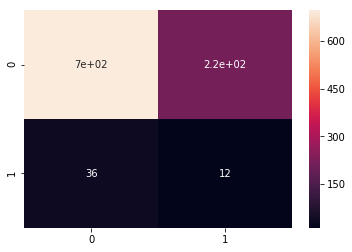

In [20]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20), random_state=1, learning_rate_init=0.0001, max_iter=1000)
#clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8), random_state=1, learning_rate_init=0.0001, max_iter=10000);

clf.fit(X_train, y_train);
pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred);
print("Accuracy: ", accuracy);


from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = pd.DataFrame(confusion_matrix(y_test, pred));

sns.heatmap(cm, annot=True);
plt.show();
plt.savefig('confusion matrix.png')
#plt.savefig('confusion matrix.png')

0.506708652793


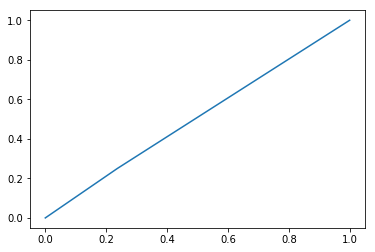

               precision    recall  f1-score   support

  Normal Days       0.95      0.76      0.85       913
Power Outages       0.05      0.25      0.09        48

  avg / total       0.91      0.74      0.81       961



In [21]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, pred));
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, pred);
roc_auc = auc(fpr, tpr);
plt.plot(fpr, tpr);
plt.show();
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names = ['Normal Days', 'Power Outages']));

In [22]:
# #Calculate how many Power outages were predicted correctly
# actualOutage = set(np.nonzero(y_test)[0]);
# predictedOutage = set(np.nonzero(pred)[0]);
# accuratePrediction = predictedOutage.intersection(actualOutage);
# if len(accuratePrediction)>len(actualOutage):
#     accuracyPredictionPercentage = 100;
# else:
#     accuracyPredictionPercentage = len(accuratePrediction)/len(actualOutage)*100;
# print("Out of the number of actual ones, it predicted : ", accuracyPredictionPercentage);

In [23]:
# #Calculate how many days were classified as normal days
# noOutage = set(np.where(y_test == 0)[0])
# predictedNoOutage = set(np.where(pred == 0)[0])
# accuratePredictionNoOutage = predictedNoOutage.intersection(noOutage);
# if len(accuratePredictionNoOutage)>len(noOutage):
#     accuratePredictionNoOutagePercentage = 100
# else:
#     accuratePredictionNoOutagePercentage = len(accuratePredictionNoOutage)/len(noOutage)*100;
# print("Out of the number of normal days, it predicted : ", accuratePredictionNoOutagePercentage);

In [24]:
# #Now find how well was the data undersampled using clustering
# raw_data = pd.read_csv('data.csv');
# raw_data = raw_data.fillna(0);
# raw_data['Avg Wind Speed Squared'] = pd.Series(np.square(raw_data['Average Wind Speed']));
# raw_data['5 second wind speed squared'] = pd.Series(np.square(raw_data['Fastest 5 second wind speed']));
# raw_data['2 min wind speed squared'] = pd.Series(np.square(raw_data['Fastest 2 minute wind speed']));
# raw_data = raw_data.drop(['DATE','TMAX','TMIN','Smoke/Haze','Average Wind Speed','Fastest 5 second wind speed','Fastest 2 minute wind speed'], axis=1);
# #Normalize data
# scaledData = preprocessing.MinMaxScaler().fit_transform(raw_data.values);
# raw_data = pd.DataFrame(scaledData, index = raw_data.index, columns = raw_data.columns);


In [25]:
# y_test = raw_data['Power Outage'];
# raw_data=raw_data[['Avg Wind Speed Squared','2 min wind speed squared','5 second wind speed squared','Fog/Ice','Thunder']];
# X = df[['Avg Wind Speed Squared','2 min wind speed squared','5 second wind speed squared','Fog/Ice','Thunder']];
# X_test = raw_data;
